# DidgeLab tutorial part 2 - Create geometries from parametric shapes

DidgeLab creates didgeridoo geometries from **parametric shapes**. A shape is a class that implements a **genome** (a vector of numbers in [0, 1]) and a method **genome2geo()** that turns the genome into a bore geometry (`Geo`). The genome is the list of parameters; evolution (e.g. mutation and crossover) works on these genes.

Shapes in DidgeLab are named after places. This tutorial uses the **Kigali shape** (`WebShape` in code): a power-law taper with configurable length, bell size, exponent, segment offsets, and optional "bubbles" (local bulges). The genome encodes all of these; you can inspect `shape.genome` and call `shape.genome2geo()` to get the bore.

Below we create a random Kigali shape, convert it to a geometry, and visualize it.

array([0.28920733, 0.01630334, 0.72998336, 0.73531349, 0.12006356,
       0.01745852, 0.03542436, 0.22666695, 0.22227978, 0.47163987,
       0.45120313, 0.26021998, 0.91580026, 0.69582524, 0.13575106,
       0.45076741, 0.34769205, 0.87201898, 0.13631608, 0.05036727,
       0.77802783, 0.69912315, 0.59260878, 0.10538962, 0.31392879,
       0.88827766, 0.09942273, 0.23742069, 0.53655142, 0.80070495,
       0.42374342, 0.48058049, 0.63679237, 0.2062183 , 0.55536167,
       0.18858396, 0.89700074, 0.14343951, 0.7536672 , 0.58529872,
       0.27564852, 0.2175854 , 0.93180447, 0.08555315, 0.06533405,
       0.14977301, 0.01370709, 0.68321126, 0.91618855])

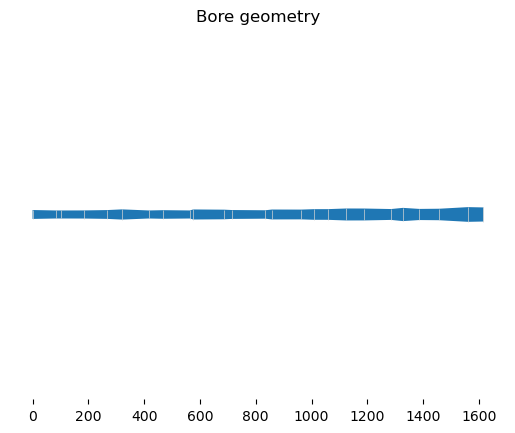

In [1]:
from didgelab import KigaliShape, plot_bore

shape = KigaliShape(
    n_segments = 24,
    d0 = 32,
    d_bell_min = 50,
    d_bell_max = 80,
    max_length = 1900,
    min_length = 1500,
    n_bubbles = 0,
    smoothness = 0.3
)
geo = shape.genome2geo()
plot_bore(geo)

# Genome: vector of genes in [0, 1] (length, bell size, power, segment offsets, ...)
shape.genome

## Mutate the genome

We use the evolution API: **SimpleMutation** adds random noise to the genome (with optional mutation rate and per-gene probability). We **clone** the shape to get a copy, apply the mutator, then convert the mutated genome to a geometry with **genome2geo()**.

<Axes: title={'center': 'Bore geometry'}>

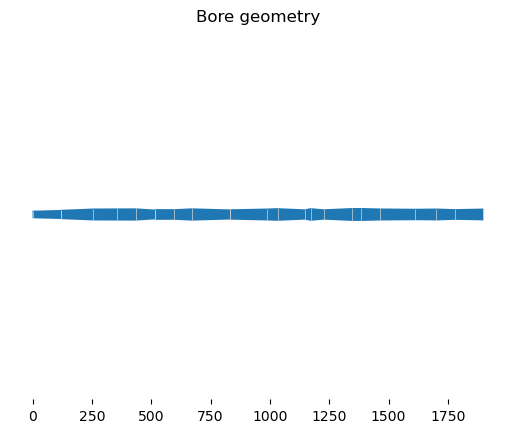

In [15]:
import matplotlib.pyplot as plt
from didgelab import SimpleMutation

mutator = SimpleMutation()
evolution_parameters = {"mutation_rate": 0.3, "gene_mutation_prob": 0.5}

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for i in range(6):
    mutant, _ = mutator.apply(shape.clone(), evolution_parameters)
    geo = mutant.genome2geo()
    plot_bore(geo, ax=axes.flat[i])
plt.tight_layout()
plt.show()

Next we randomly mutate the Kigali shape 8 times. Each row shows one mutant: left column is the bore geometry, right column is the impedance spectrum (from `acoustical_simulation`). The resonant peaks (drone and toots) vary with the shape.

Kigali (and other DidgeLab shapes) use a fixed mouthpiece diameter (e.g. 32 mm). The visualization scales the bore so the shape is visible; true aspect ratio would make a long bore look like a thin line.

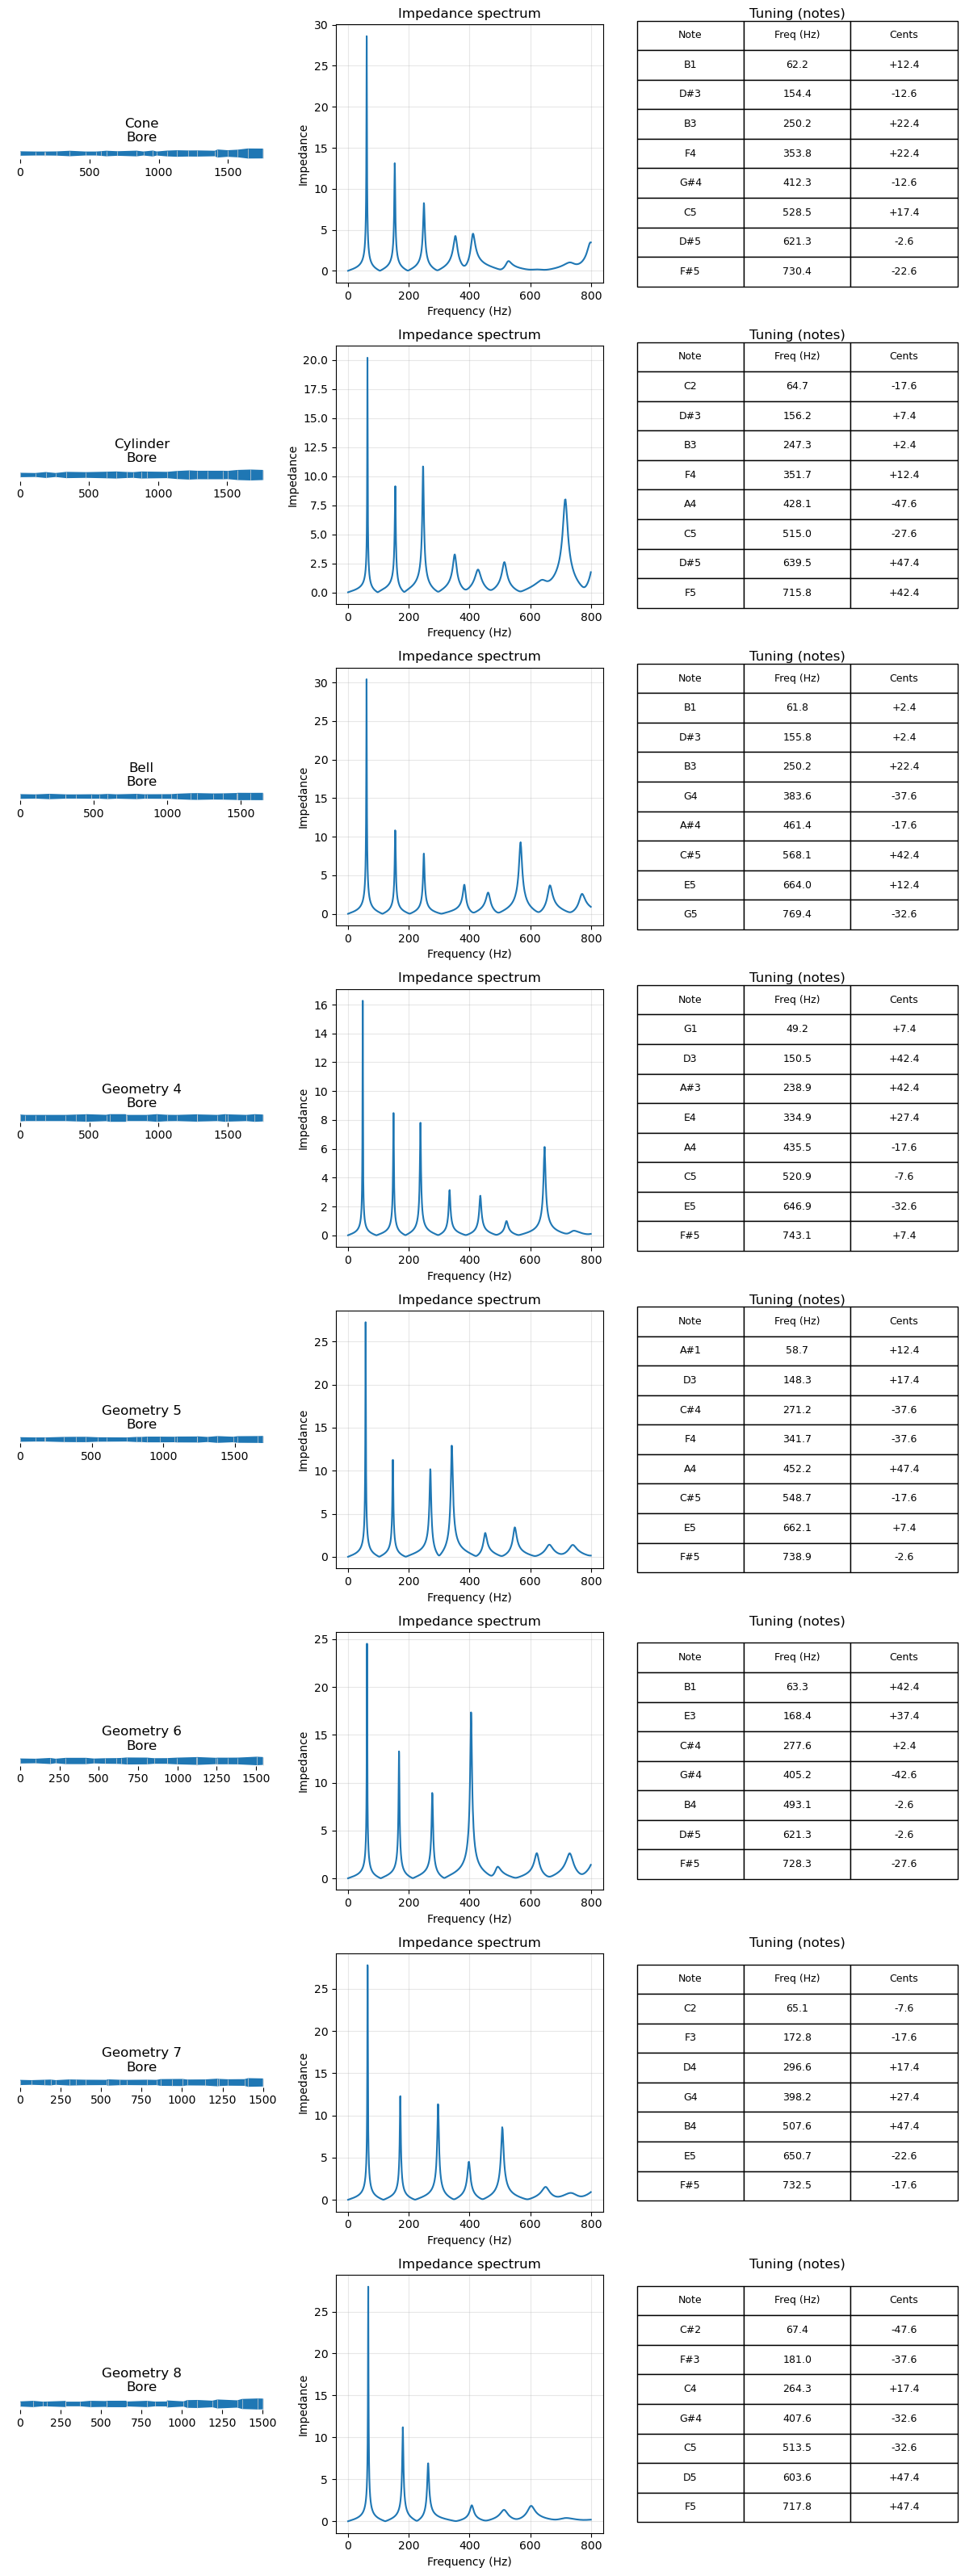

In [16]:
import matplotlib.pyplot as plt
from didgelab import acoustical_simulation, get_log_simulation_frequencies, plot_geo_impedance_notes

# plt.figure(figsize=(12, 2 * 8))
n_mutants = 8
freqs = get_log_simulation_frequencies(1, 1000, 5)
geos = []
for i in range(n_mutants):
    mutant, _ = mutator.apply(shape.clone(), evolution_parameters)
    geo = mutant.genome2geo()
    geos.append(geo)
#     plt.subplot(n_mutants, 2, 2 * i + 1)
#     plot_bore(geo)
#     plt.title("mutant " + str(i))

#     plt.subplot(n_mutants, 2, 2 * i + 2)
#     impedance = acoustical_simulation(geo, freqs)
#     plt.plot(freqs, impedance)
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Impedance")
#     plt.title("Impedance spectrum")
# plt.tight_layout()
# plt.show()

fig, axes = plot_geo_impedance_notes(
    geos,
    fmin=1,
    fmax=800,
    max_error=5,
    base_freq=440,
    titles=["Cone", "Cylinder", "Bell"],
)


A later tutorial will cover how to create your own shapes (subclass `GeoGenome` and implement `genome2geo()`).

The **evo** module provides several mutators (e.g. **SimpleMutation**, **SingleMutation**, **RandomMutation**) and crossover operators; you can plug them into the full evolution loop (see `didgelab.evo.evolution` or `didgelab.nuevolution`) to optimize shapes toward target frequencies or impedance profiles.